In [117]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

%matplotlib inline

In [118]:
# Read the cc_default.csv file from the Resources folder into a Pandas DataFrame
nn_df = pd.read_csv(
    Path(r"Resources/Sample4.csv").absolute()
    , index_col="Timestamp", infer_datetime_format=True, parse_dates=True)
nn_df = nn_df.drop(columns=["Unnamed: 0"])
# Review the DataFrame
nn_df

C:\Users\victo\AppData\Local\Temp\ipykernel_10300\233321205.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nn_df = pd.read_csv(


,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
Timestamp,,,,,,,,,,
2022-09-08 13:59:00,4726,807215870,23538,809350870,2489.79,US Dollar,2489.79,US Dollar,Cheque,0
2022-09-09 15:46:00,70,1004286A8,117698,80BA727F0,1802.44,Euro,1802.44,Euro,Cheque,0
2022-09-05 23:11:00,16788,8041F5380,11813,805DFD130,27.93,US Dollar,27.93,US Dollar,Credit Card,0
2022-09-09 19:56:00,70,100428780,16,8049AF0E0,4915318.35,Rupee,4915318.35,Rupee,Cheque,0
2022-09-06 08:01:00,28237,80A89A140,30039,80B080DB0,0.10,Australian Dollar,0.10,Australian Dollar,Wire,0
...,...,...,...,...,...,...,...,...,...,...
2022-09-02 16:09:00,44458,8118F24E0,22,812D76B30,446.12,Euro,446.12,Euro,Wire,0
2022-09-01 21:09:00,12,80018EE40,18015,8077DC800,119.51,US Dollar,119.51,US Dollar,ACH,0
2022-09-09 00:03:00,11,8006CA910,214100,80D22CA10,157.94,Euro,157.94,Euro,Credit Card,0


In [119]:
nn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101567 entries, 2022-09-08 13:59:00 to 2022-09-05 03:09:00
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           101567 non-null  int64  
 1   Account             101567 non-null  object 
 2   To Bank             101567 non-null  int64  
 3   Account.1           101567 non-null  object 
 4   Amount Received     101567 non-null  float64
 5   Receiving Currency  101567 non-null  object 
 6   Amount Paid         101567 non-null  float64
 7   Payment Currency    101567 non-null  object 
 8   Payment Format      101567 non-null  object 
 9   Is Laundering       101567 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.5+ MB


In [120]:
# Define the target set by selecting the "Is Laundering" column
y = nn_df["Is Laundering"]

# Display a sample of y
y

Timestamp
2022-09-08 13:59:00    0
2022-09-09 15:46:00    0
2022-09-05 23:11:00    0
2022-09-09 19:56:00    0
2022-09-06 08:01:00    0
                      ..
2022-09-02 16:09:00    0
2022-09-01 21:09:00    0
2022-09-09 00:03:00    0
2022-09-08 00:38:00    0
2022-09-05 03:09:00    0
Name: Is Laundering, Length: 101567, dtype: int64

In [135]:
# Define features set X by selecting all columns but the Is Laundering 
X = nn_df.drop(columns=["Account", "Account.1", "Receiving Currency", "Payment Currency", "Payment Format", "Is Laundering"])

# Display the features DataFrame
X

,From Bank,To Bank,Amount Received,Amount Paid
Timestamp,,,,
2022-09-08 13:59:00,4726,23538,2489.79,2489.79
2022-09-09 15:46:00,70,117698,1802.44,1802.44
2022-09-05 23:11:00,16788,11813,27.93,27.93
2022-09-09 19:56:00,70,16,4915318.35,4915318.35
2022-09-06 08:01:00,28237,30039,0.10,0.10
...,...,...,...,...
2022-09-02 16:09:00,44458,22,446.12,446.12
2022-09-01 21:09:00,12,18015,119.51,119.51
2022-09-09 00:03:00,11,214100,157.94,157.94


In [122]:
# Create training and testing datasets using train_teat_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [123]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [124]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [125]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [126]:
# Define the the number of inputs to the model
number_inputs = 4

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 12

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 8

# Create the Sequential model instance
nn = Sequential()

# Add the first Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_inputs, activation="relu"))

# Add the second Dense layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(1, activation="sigmoid"))

In [127]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                60        
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [129]:
# Fit the model using 100 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
2381/2381 [==============================] - 6s 2ms/step - loss: 0.0333 - accuracy: 0.9989
Epoch 2/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9989
Epoch 3/50
2381/2381 [==============================] - 7s 3ms/step - loss: 0.0086 - accuracy: 0.9989
Epoch 4/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 5/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 6/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 7/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 8/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 9/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 10/50
2381/2381 [==============================] - 6s 3ms/step - loss: 0.008

In [130]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

794/794 - 1s - loss: 0.0085 - accuracy: 0.9989 - 1s/epoch - 2ms/step
Loss: 0.008513659238815308, Accuracy: 0.998936653137207


<Axes: >

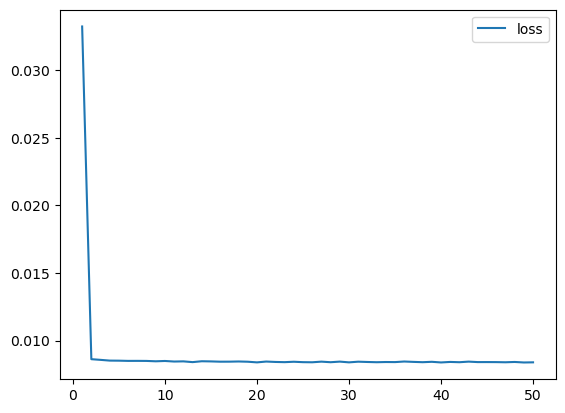

In [131]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<Axes: >

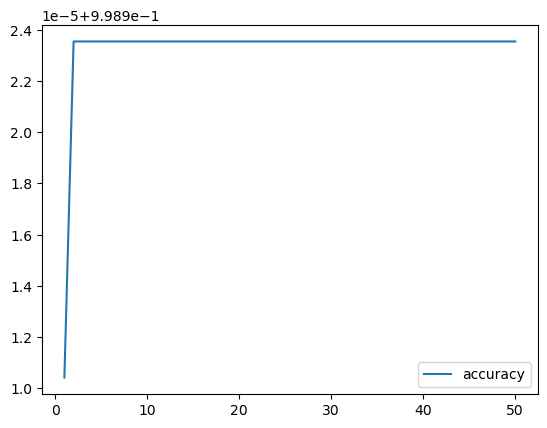

In [132]:
# Plot the accuracy
df.plot(y="accuracy")

In [144]:
# Making predictions
predictions_nn = (nn.predict(X_test) > 0.5).astype("int32")

results = pd.DataFrame({"predictions": predictions_nn.ravel(), "actual": y_test})
results

794/794 [==============================] - 2s 2ms/step


,predictions,actual
Timestamp,,
2022-09-02 13:01:00,0,0
2022-09-10 07:09:00,0,0
2022-09-04 22:38:00,0,0
2022-09-01 00:01:00,0,0
2022-09-07 06:24:00,0,0
...,...,...
2022-09-06 02:59:00,0,0
2022-09-01 03:14:00,0,0
2022-09-09 20:26:00,0,0


In [145]:
# Use a classification report to evaluate the model using the predictions and testing data
nn_pred_report = classification_report(y_test, predictions_nn)

# Print the classification report
print(nn_pred_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25365
           1       0.00      0.00      0.00        27

    accuracy                           1.00     25392
   macro avg       0.50      0.50      0.50     25392
weighted avg       1.00      1.00      1.00     25392



C:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_nn)

array([[25365,     0],
       [   27,     0]], dtype=int64)